# 04 King County House Sales - Supervised Machine Learning - Linear-Regression

### This notebook contains:
    01. Importing Libraries
    02. Importing Data
    03. Data Cleaning
        A. Missing Values
        B. Duplicates
        C. Outliers
    04. Data Preparation
        A. Choosing Data for Testing
            a. Hypothesis 1
            b. Hypothesis 2
        B. Reshaping Variables
            a. Hypothesis 1
            b. Hypothesis 2
    05. Regression analysis
        A. Hypothesis 1
            a. Linear Regression
            b. Scatterplot
            c. Interpretation of Results
            d. Model Performance Statistics
            e. Comparison: Prediction Results vs Actual Values
            f. Reflection Model Performance
        B. Hypothesis 2
            a. Linear Regression
            b. Scatterplot
            c. Interpretation of Results
            d. Model Performance Statistics
            e. Comparison: Prediction Results vs Actual Values
            f. Reflection Model Performance

## 01. Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# command for matplotlib visuals to appear in the notebook 

%matplotlib inline

## 02. Importing Data

In [37]:
# turning project folder path into string
path = r'/Users/lisa/DA Projects/01-2023 King County House Sales'

In [38]:
# importing house sale data
dfhs = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'kc_house_data_price-cats.csv'), index_col = False)

In [39]:
# check
dfhs.head()

,Unnamed: 0.1,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_category
0,0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,low price
1,1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,medium price
2,2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,low price
3,3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,medium price
4,4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,medium price


In [40]:
# dropping index columns
dfhs = dfhs.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [41]:
#check
dfhs.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_category
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,low price
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,medium price
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,low price
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,medium price
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,medium price


In [42]:
dfhs.shape

(21596, 22)

## 03. Data Cleaning

### A. Missing Values

In [43]:
# checking for missing values
dfhs.isnull().sum() # no NAs

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
price_category    0
dtype: int64

### B. Duplicates

In [44]:
# identifying duplicates/ counting dups
dfhs.duplicated().sum()

0

### C. Outliers

<AxesSubplot:xlabel='price', ylabel='Count'>

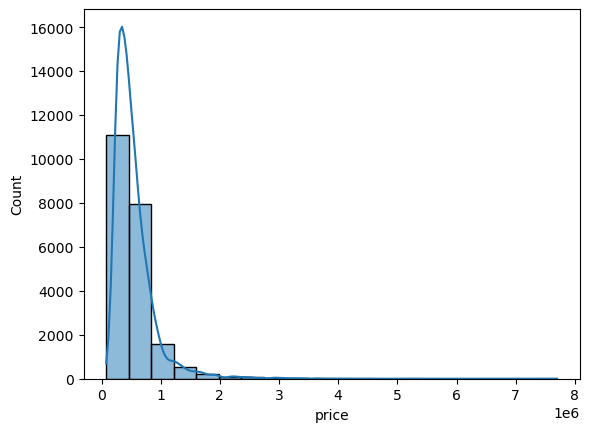

In [45]:
# creating histogram to check for extreme prices
sns.histplot(dfhs['price'], bins=20, kde = True)

In [46]:
# Checking extreme values -> prices over 3 mio
dfhs[dfhs['price'] >3000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_category
300,3225069065,20140624T000000,3075000.0,4,5.00,4550,18641,1.0,1,4,...,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508,high price
656,3760500116,20141120T000000,3070000.0,3,2.50,3930,55867,1.0,1,4,...,2330,1600,1957,0,98034,47.7022,-122.224,2730,26324,high price
1162,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788,high price
1313,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619,high price
1446,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,high price
2083,8106100105,20141114T000000,3850000.0,4,4.25,5770,21300,2.0,1,4,...,5770,0,1980,0,98040,47.5850,-122.222,4620,22748,high price
2442,7524900003,20141210T000000,3278000.0,2,1.75,6840,10000,2.5,1,4,...,4350,2490,2001,0,98008,47.6042,-122.112,3120,12300,high price
2624,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,6350,290,2004,0,98155,47.7493,-122.280,3030,23408,high price
2862,4114601570,20141118T000000,3600000.0,3,3.25,5020,12431,2.0,1,4,...,3420,1600,1941,2002,98144,47.5925,-122.287,3680,12620,high price
3910,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,high price


In [47]:
# Calculating the mean
dfhs['price'].mean()

540198.2986664197

In [48]:
# calculating median
dfhs['price'].median()

450000.0

In [49]:
# calculating max
dfhs['price'].max()

7700000.0

## 04. Data Preparation

### A. Choosing Variables for Testing

#### Hypothesis 1: If the squarefootage of the living space is high, the house sales price is high.

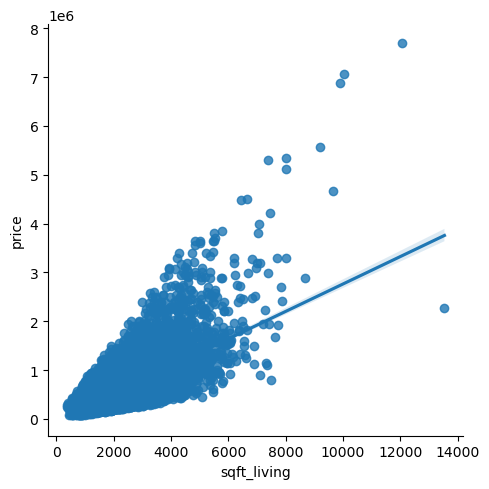

In [50]:
# creating a scatterplot for 
scatter1 = sns.lmplot(x = 'sqft_living', y = 'price', data = dfhs)
figure = scatter1.fig    
figure.savefig('scatter_sqft_above-price.png', bbox_inches='tight', dpi=400)

#### Hypothesis 2: If the grade is high, the house sales price is high.

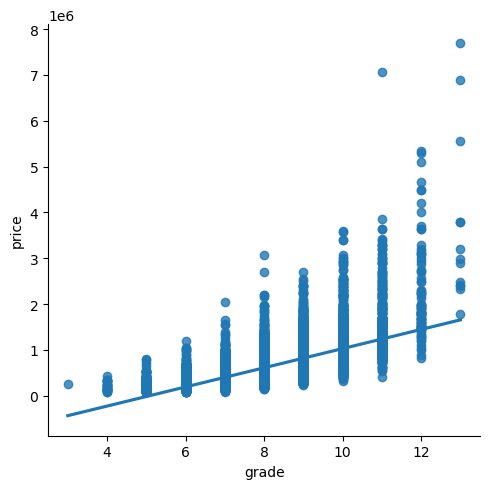

In [51]:
scatter2 = sns.lmplot(x = 'grade', y = 'price', data = dfhs)
figure = scatter2.fig    
figure.savefig('scatter_grade-price.png', bbox_inches='tight', dpi=400)

### B. Reshaping Variables

#### Hypothesis 1: If the squarefootage of the living space is high, the house sales price is high.

In [52]:
# Turning variables into array lists
X = dfhs['sqft_living'].values.reshape(-1,1)
y = dfhs['price'].values.reshape(-1,1)

In [53]:
# check x
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [54]:
# check y
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [55]:
# Split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Hypothesis 2: If the grade is high, the house sales price is high.

In [56]:
# Turning grade variable into array list
V = dfhs['grade'].values.reshape(-1,1)
w = dfhs['price'].values.reshape(-1,1)

In [57]:
# check x2
V

array([[7],
       [7],
       [6],
       ...,
       [7],
       [8],
       [7]])

In [59]:
#check w
w

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [58]:
# Split data into training & test sets
V_train, V_test, w_train, w_test = train_test_split(V, w, test_size=0.3, random_state=0)

## 05. Regression analysis

### A. Hypothesis 1: If the squarefootage of the living space is high, the house sales price is high.

#### a. Linear Regression

In [60]:
# Creating regression object
regression1 = LinearRegression()

In [61]:
# Fit the regression object onto the training set.
regression1.fit(X_train, y_train)

LinearRegression()

In [62]:
# Predict the values of y using X.
y_predicted = regression1.predict(X_test)

#### b. Scatterplot

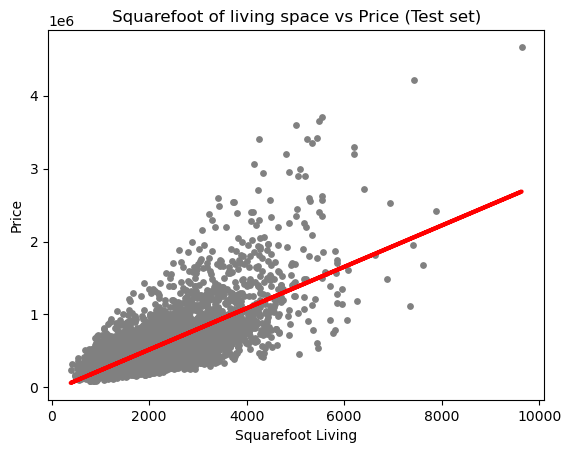

In [68]:
# Creating plot for results.
plot_test1 = plt
plot_test1.scatter(X_test, y_test, color='gray', s = 15)
plot_test1.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test1.title('Squarefoot of living space vs Price (Test set)')
plot_test1.xlabel('Squarefoot Living')
plot_test1.ylabel('Price')
plot_test1.savefig('Squarefoot of living space vs Price-Test set.png', bbox_inches='tight', dpi=400)
plot_test1.show() 

#### c. Interpretation of Results

The trend line fits the big cluster of houses that is located under 1 mio dollars and under 4000 sqft living space. But there is almost a second trend noticeable, where especially high-priced houses have a squarefootage between 2000 to 6000. The data points are not as condensed as the cluster below. So eventhough a higher squarefootage indicates a higher price, there are probably other factors that dictate the price.

#### d. Model Performance Statistics

In [69]:
# Create objects that contain the model summary statistics.
h1rmse = mean_squared_error(y_test, y_predicted) 
h1r2 = r2_score(y_test, y_predicted) 

In [72]:
# Print the model summary statistics. 
print('Slope:' ,regression1.coef_)
print('Mean squared error: ', h1rmse)
print('R2 score: ', h1r2)

Slope: [[283.64739343]]
Mean squared error:  63070625848.87541
R2 score:  0.4985735025227618


#### e. Comparison: Prediction Results vs Actual Values

In [74]:
y_predicted

array([[1073871.20445039],
       [ 730657.85840052],
       [ 381771.56448206],
       ...,
       [ 395953.93415354],
       [ 543450.57873696],
       [ 186054.8630156 ]])

In [73]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,650000.0,1.073871e+06
1,635000.0,7.306579e+05
2,565000.0,3.817716e+05
3,415000.0,4.923940e+05
4,279475.0,2.512938e+05
5,230000.0,3.562433e+05
6,230000.0,4.129728e+05
7,310000.0,4.498469e+05
8,330000.0,4.867211e+05
9,1400000.0,1.105072e+06


#### f. Reflection Model Performance

The model is inaccurate. The slope may indicate a positive relationship, but the high MSE shows a high difference between the estimated values and the true values. The comparison between the predicted results and the actual values provide further evidence for that. The R2 value (0.49) also indicates that the model does not perform adequately. 

### B. Hypothesis 2: If the grade is high, the house sales price is high.

#### a. Linear Regression

In [75]:
# Creating regression object
regression2 = LinearRegression()

In [76]:
# Fit the regression object onto the training set.
regression2.fit(V_train, w_train)

LinearRegression()

In [77]:
# Predict the values of w using V.
w_predicted = regression2.predict(V_test)

#### b. Scatterplot

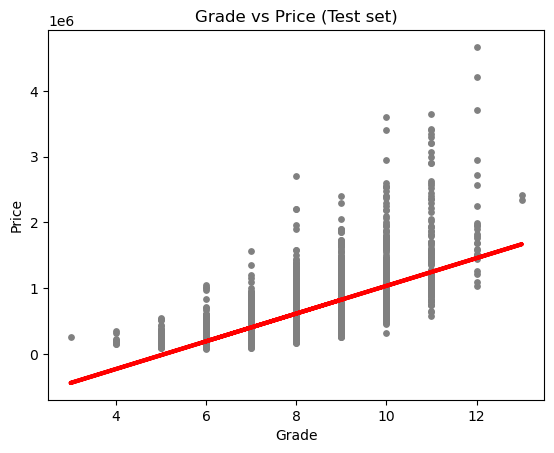

In [78]:
# Creating plot for results.
plot_test2 = plt
plot_test2.scatter(V_test, w_test, color='gray', s = 15)
plot_test2.plot(V_test, w_predicted, color='red', linewidth =3)
plot_test2.title('Grade vs Price (Test set)')
plot_test2.xlabel('Grade')
plot_test2.ylabel('Price')
plot_test2.savefig('Grade vs Price-Test set.png', bbox_inches='tight', dpi=400)
plot_test2.show() 

#### c. Interpretation of Results

The trend line does not fit most of the data points. While it looks as if the general assumption is true that a higher grade means a higher price, there are data points that say otherwise. For example, there are houses that have a grade of 12 (almost highest grade, 13 is highest) and are under $1 mio. 
The data points are also not as tightly clustered, which is another sign of inaccuracy.

#### d. Model Performance Statistics

In [79]:
# Create objects that contain the model summary statistics.
h2rmse = mean_squared_error(w_test, w_predicted) 
h2r2 = r2_score(w_test, w_predicted) 

In [80]:
# Print the model summary statistics. 
print('Slope:' ,regression2.coef_)
print('Mean squared error: ', h2rmse)
print('R2 score: ', h2r2)

Slope: [[210771.22416012]]
Mean squared error:  67501714692.69652
R2 score:  0.46334529083049913


#### e. Comparison: Prediction Results vs Actual Values

In [81]:
w_predicted

array([[825237.06235405],
       [614465.83819393],
       [614465.83819393],
       ...,
       [192923.38987368],
       [403694.61403381],
       [192923.38987368]])

In [82]:
# Create a dataframe comparing the actual and predicted values of w.
data = pd.DataFrame({'Actual': w_test.flatten(), 'Predicted': w_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,650000.0,8.252371e+05
1,635000.0,6.144658e+05
2,565000.0,6.144658e+05
3,415000.0,4.036946e+05
4,279475.0,1.929234e+05
5,230000.0,4.036946e+05
6,230000.0,4.036946e+05
7,310000.0,6.144658e+05
8,330000.0,4.036946e+05
9,1400000.0,6.144658e+05


#### f. Reflection Model Performance

As with the model for hypothesis 1, this model is inaccurate as well. The slope indicates a positive relationship, but the MSE shows a high difference between the predicted results and the actual values. Again, the comparison between the predicted results and the actual values provide further evidence for that. In some cases there are big differences between the two values. The R2 value (0.46) also indicates that the model does not perform adequately.